In [9]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercício MTEch Dia 3

Este é o último dos três exercícios práticos que serão disponibilizados durante o
MTEch 2021.

Nestes [link 1](https://drive.google.com/file/d/1wBMGWDxtU0EX9SVcKPOGdoNSKs8iVr3Y/view) e [link 2](https://drive.google.com/file/d/1rKUJr8YZhiB180naeSS_AH09lgjT3Dpj/view) você encontra duas bases contendo dados sobre 611 personagens da Marvel e DC, dentre eles a destemida Mulher Maravilha, o grande Homem-Aranha e a mortal Viúva Negra. Você deve carregá-las no Colab e descobrir:

- O quão inteligentes são os heróis nas bases? (histograma do atributo inteligência)
- Os heróis mais poderosos (Power > 75), inteligentes (Intelligence > 80) e rápidos (Speed > 80) são maioria do bem ou do mau?
- Esses heróis mais poderosos, inteligentes e rápidos são maioria da Marvel ou DC?

In [10]:
# exploring characters_stats dataset
df_char_stats = pd.read_csv('characters_stats.csv')

display(df_char_stats.head())
display(df_char_stats.info())

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


None

In [11]:
# exploring marvel_characters_info dataset
df_char_info = pd.read_csv('marvel_characters_info.csv', index_col=0)

display(df_char_info.head())
display(df_char_info.info())

,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
ID,,,,,,,,,,
0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       734 non-null    object 
 1   Alignment  734 non-null    object 
 2   Gender     734 non-null    object 
 3   EyeColor   734 non-null    object 
 4   Race       734 non-null    object 
 5   HairColor  734 non-null    object 
 6   Publisher  719 non-null    object 
 7   SkinColor  734 non-null    object 
 8   Height     734 non-null    float64
 9   Weight     732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


None

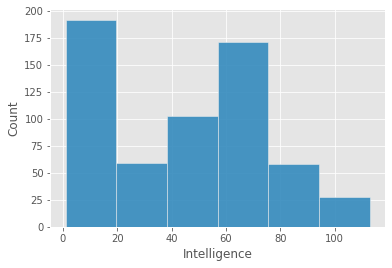

In [12]:
# how smart are the super-heros?
_ = plt.style.use('ggplot')
_ = sns.histplot(data=df_char_stats, x='Intelligence', bins=6, alpha=0.9)

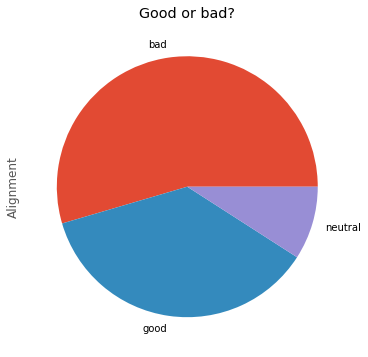

In [13]:
# powerful characters
most_powerful = df_char_stats.loc[(df_char_stats['Intelligence'] > 80) & (df_char_stats['Speed'] > 80) & (df_char_stats['Power'] > 75)]

_ = plt.figure(figsize=(6, 6))
_ = plt.pie(most_powerful['Alignment'].value_counts(), labels=most_powerful['Alignment'].value_counts().index)
_ = plt.ylabel('Alignment')
_ = plt.title('Good or bad?')

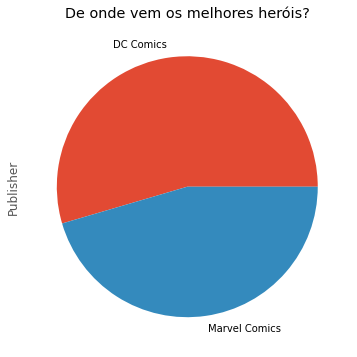

In [17]:
hero_list = most_powerful['Name']

marvel_or_dc = df_char_info.loc[df_char_info['Name'].isin(hero_list)]

marvel_or_dc['Publisher'].value_counts().plot(kind = 'pie',
                                     title = 'De onde vem os melhores heróis?', 
                                     figsize = (8,6))